In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
x = cancer.data
y = cancer.target

x_train, x_test, y_train, y_test = train_test_split(x,y,stratify=y,test_size=0.2,random_state=42)

In [2]:
class SingleLayer:
  
  def __init__(self):
    self.w = None
    self.b = None
    self.losses = []
        
  def forpass(self, x):
    z = np.sum(x * self.w) + self.b
    return z
    
  def backprop(self, x, err):
    w_grad = x * err
    b_grad = 1 * err
    return w_grad, b_grad

  def activation(self, z):
    z = np.clip(z, -100, None)
    a = 1 / (1 + np.exp(-z))
    return a
    
  def fit(self, x, y, epochs=100):
    self.w = np.ones(x.shape[1])	# 가중치를 초기화합니다. (1로 초기화)
    self.b = 0						# 절편을 초기화합니다. (0으로 초기화)
    for i in range(epochs):			# epochs만큼 반복합니다.
      loss = 0
      indexes = np.random.permutation(np.arange(len(x)))	# 인덱스를 섞습니다.
      for i in indexes:				# 모든 샘플에 대해 반복합니다.
        z = self.forpass(x[i])		# 정방향 계산
        a = self.activation(z)		# 활성화 함수 적용
        err = -(y[i] - a)			# 오차 계산
        w_grad, b_grad = self.backprop(x[i], err)	#역방향 계산
        self.w -= w_grad			# 가중치 업데이트
        self.b -= b_grad			# 절편 업데이트
        a = np.clip(a, 1e-10, 1-1e-10)	# 안전한 로그 계산을 위해 클리핑한 후 손실을 누적합니다.
        loss += -(y[i]*np.log(a)+(1-y[i]*np.log(1-a)))	# 에포크마다 평균 손실을 저장합니다.
      self.losses.append(loss/len(y))
            
  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x]	# 정방향 계산
    return np.array(z) > 0					# 계단 함수 적용

  def score(self, x, y):
    return np.mean(self.predict(x) == y)

In [3]:
layer = SingleLayer()
layer.fit(x_train, y_train)
layer.score(x_test, y_test)		# 0.9298245614035088

0.9473684210526315

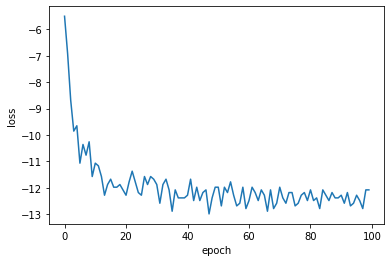

In [4]:
plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()